# Crimes in Boston

### This dataset has crime data from the Boston metropolitan area from the years of 2015 - 2017. We will be doing data analysis on this, as there is not much in the way of classes to predict.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

%%javascript # Stops scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

SyntaxError: invalid syntax (<ipython-input-73-9ccd373dc8a9>, line 9)

In [2]:
crimes = pd.read_csv("../data/crime.csv", encoding = "ISO-8859-1")
offCodes = pd.read_csv("../data/offense_codes.csv", encoding = "ISO-8859-1")

In [3]:
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [5]:
crimes.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [6]:
crimes.groupby('DAY_OF_WEEK').count()['OFFENSE_CODE']

DAY_OF_WEEK
Friday       48495
Monday       45679
Saturday     44818
Sunday       40313
Thursday     46656
Tuesday      46383
Wednesday    46729
Name: OFFENSE_CODE, dtype: int64

The crime is spread out across days of the week, which is to be expected

In [7]:
crimes.groupby('MONTH').count()['OFFENSE_CODE']

MONTH
1     23610
2     21653
3     24146
4     24086
5     26199
6     30568
7     34556
8     34823
9     26543
10    25737
11    23675
12    23477
Name: OFFENSE_CODE, dtype: int64

Crime increases in the summer, which is to be expected

In [8]:
crimes.nunique()

INCIDENT_NUMBER        282517
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            879
SHOOTING                    1
OCCURRED_ON_DATE       233229
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4657
Lat                     18178
Long                    18178
Location                18194
dtype: int64

### Since latitude and longitude both have a very narrow range, we normalize to get an accurate representation of the data distribution.

In [10]:
from math import floor, ceil
def returnMantissa(num):
    # Returns the mantissa
    if num > 0:
        integer = floor(num)
    elif num < 0:
        integer = ceil(num)
    else:
        return np.nan
    return num % integer

In [11]:
print('Unique Lat:', crimes['Lat'].apply(lambda num: returnMantissa(num)).nunique(),
     'Unique Long:', crimes['Long'].apply(lambda num: returnMantissa(num)).nunique())

Unique Lat: 18178 Unique Long: 18178


In [12]:
newLat = crimes['Lat'].apply(lambda num: returnMantissa(num))
newLong = crimes['Long'].apply(lambda num: returnMantissa(num))
crimes['Lat'] = newLat
crimes['Long'] = newLong

In [13]:
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,0.357791,-0.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,0.306821,-0.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,0.346589,-0.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,0.334182,-0.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,0.275365,-0.090361,"(42.27536542, -71.09036101)"


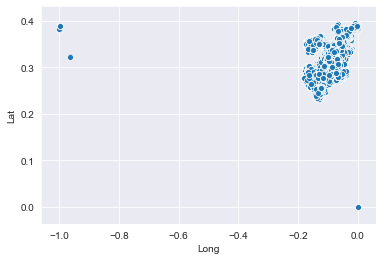

In [14]:
sns.scatterplot(crimes['Long'], crimes['Lat'])

There are a few extraneous points, so we will get rid of those

In [15]:
crimes['Long'].where(crimes['Long'] > -0.6, inplace=True)
crimes['Lat'].where(crimes['Lat'] > 0.1, inplace=True)

### A map of Metropolitan Boston as a function of crime instances, shown with districts

(0.22241329999999748, 0.40504157999999735)

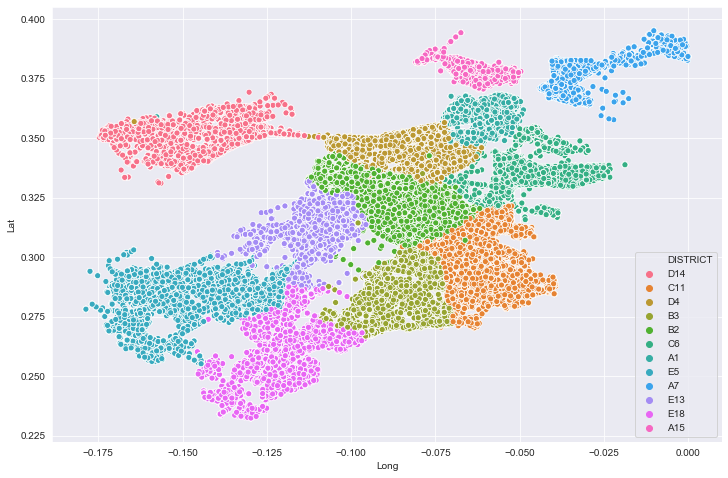

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(crimes['Long'], crimes['Lat'], hue=crimes['DISTRICT'])
plt.xlim(crimes['Long'].min() - 0.01, crimes['Long'].max() + 0.01)
plt.ylim(crimes['Lat'].min() - 0.01, crimes['Lat'].max() + 0.01)

In [17]:
crimes.drop(['INCIDENT_NUMBER'], axis=1, inplace=True)

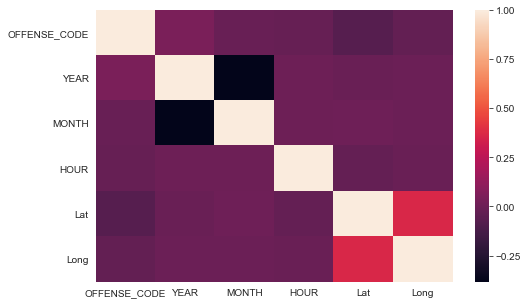

In [23]:
plt.figure(figsize=(8, 5))
sns.heatmap(crimes.corr())

In [19]:
crimes['OCCURRED_ON_DATE'] = crimes['OCCURRED_ON_DATE'].apply(lambda date: date.split(' ')[0])

In [20]:
crimes['OCCURRED_ON_DATE'].nunique()

1177

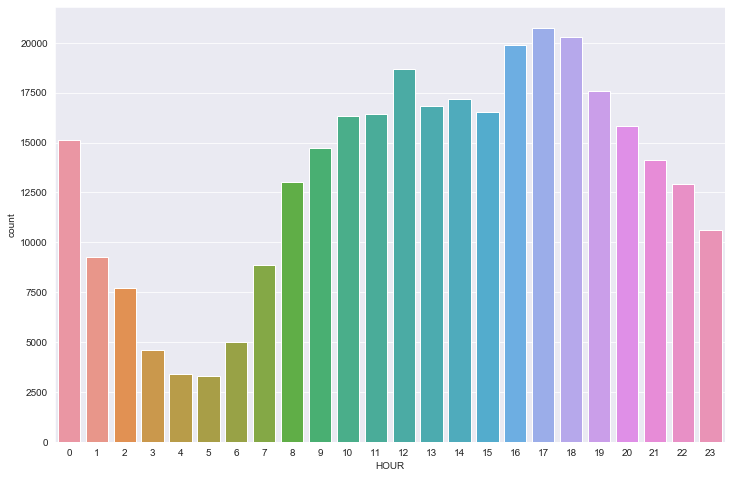

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(crimes['HOUR'])

Interestingly, crime seems to peak in mid-afternoon, rather than the evening. Could it be due to increased car accidents in rush hour?

In [28]:
crimes['OFFENSE_CODE_GROUP'].value_counts(ascending=False).head(10)

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

It is the most common offense. Let's plot this along with hours.

In [58]:
crimes[crimes['OFFENSE_CODE_GROUP'] == 'Motor Vehicle Accident Response']['HOUR'].value_counts(ascending=False).head(5)

17    2596
16    2454
18    2306
15    2076
14    1946
Name: HOUR, dtype: int64

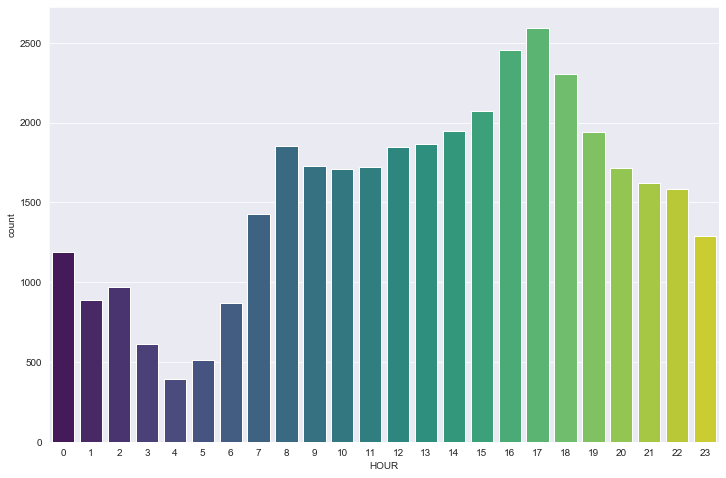

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(crimes[crimes['OFFENSE_CODE_GROUP'] == 'Motor Vehicle Accident Response']['HOUR'], palette='viridis')

Although there is a significant portion of accidents during rushour, it remains steady throughout the day. Furthermore, there were 20000 reports during rushhour, and accidents only account for ~2500 of them. Where are all the others?

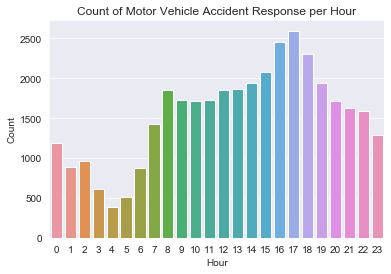

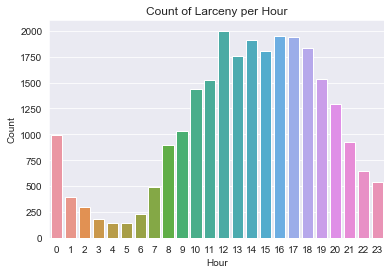

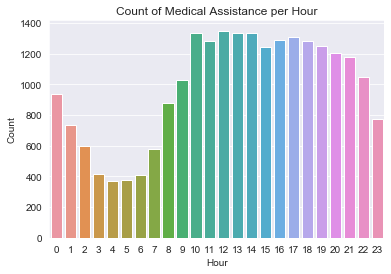

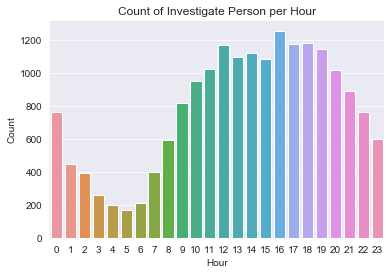

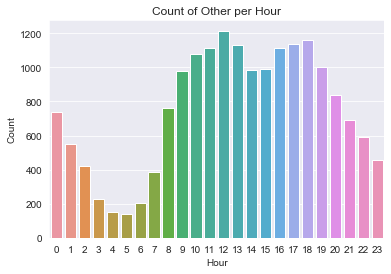

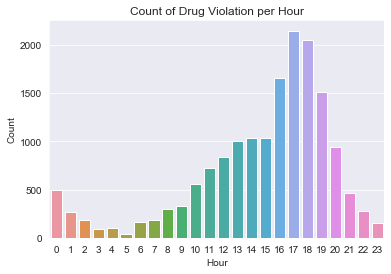

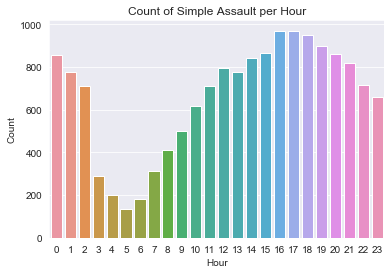

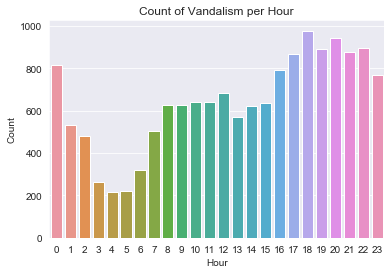

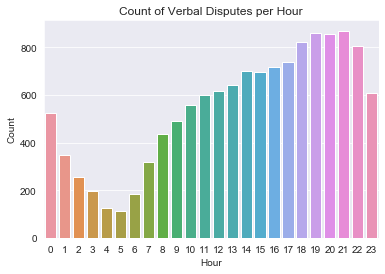

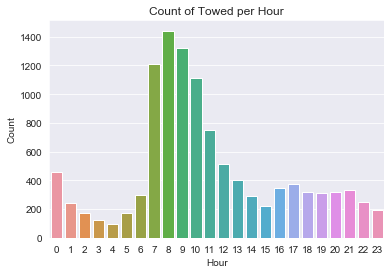

In [74]:
offCode = crimes.groupby('OFFENSE_CODE_GROUP').count()
for offense in crimes['OFFENSE_CODE_GROUP'].value_counts(ascending=False).index[:10]:
    plt.figure(figsize=(6, 4))
    sns.countplot(crimes[crimes['OFFENSE_CODE_GROUP'] == offense]['HOUR'])
    plt.title("Count of " + offense + " per Hour")
    plt.xlabel('Hour')
    plt.ylabel('Count')